In [ ]:
!pip3 install ktrain

import pandas as pd
import numpy as np

import ktrain
from ktrain import text

     |████████████████████████████████| 25.3 MB 85 kB/s 
     |████████████████████████████████| 6.8 MB 35.8 MB/s 
     |████████████████████████████████| 981 kB 42.6 MB/s 
     |████████████████████████████████| 263 kB 47.9 MB/s 
     |████████████████████████████████| 1.9 MB 38.2 MB/s 
     |████████████████████████████████| 1.2 MB 39.0 MB/s 
     |████████████████████████████████| 468 kB 42.7 MB/s 
     |████████████████████████████████| 895 kB 38.9 MB/s 
     |████████████████████████████████| 3.3 MB 22.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=cbf9d94bb844dcdf7a9967daebf5f6c2cc819468e0a535de7b951e80d63d05fd
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=c07f3a68fcdee3710812154a188b26e0f3f52b29f18fa29fc5055e59cb89b4b2
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff0

In [ ]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
      df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')

In [ ]:
data.sort_values(by='Emoji', axis=0, inplace=True)

data.set_index(keys=['Emoji'], drop=False,inplace=True)

Emojis=data['Emoji'].unique().tolist()

In [ ]:
data_train = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')
data_train['Comments'] = data_train['Comments'].astype(str)

data_test = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')
data_test['Comments'] = data_train['Comments'].astype(str)

x_train = data_train.Comments.tolist()
x_test = data_test.Comments.tolist()

y_train = data_train.Emoji.tolist()
y_test = data_test.Emoji.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['💁', '🤦', '🤷']

print('size of training set: %s' % (len(data_train['Comments'])))
print('size of validation set: %s' % (len(data_test['Comments'])))
print(data.Emoji.value_counts())

data.head(11)

size of training set: 3373
size of validation set: 3373
🤷    2264
💁    2242
🤦    2240
Name: Emoji, dtype: int64


,Comments,Category,Emoji
0,পৃথিবীতে যত রাস্তার শিশু রয়েছে সেখানে তাদের থ...,neutral,🤷
1,শিশুদের জেনে জোর করে তাদের জানানো একমাত্র বাড়...,neutral,🤷
2,রাস্তায় সংযুক্ত শিশুরা নির্যাতনকারীরা শোষণের ...,negative,🤦
3,"শিশু শব্দটার সাথে মিশে আছে ভালোবাসা, আদর এবং মমতা",positive,💁
4,আমাদের দেশে পথশিশুর সংখ্যা দিন দিন বাড়ছে,negative,🤦
5,একশ্রেণির অশিক্ষিত ও দরিদ্র মানুষ অপরিকল্পিতভা...,negative,🤦
6,কিন্তু শিশুদের যখন পথশিশু টোকাই রাস্তার ছেলে ই...,neutral,🤷
7,শিশুবান্ধব শহুরে পরিবেশ তৈরি এবং নগর কর্তৃপক্ষ...,neutral,🤷
8,পথশিশুদের ৫১ ভাগ অশ্লীল কথার শিকার হয়,negative,🤦
9,সবচেয়ে বেশি যৌন হয়রানির শিকার হয় মেয়েশিশু,negative,🤦


In [ ]:
encoding = {
    '💁': '0',
    '🤦': '1',
    '🤷': '2'
}
 # encoding = encoding.MultipartEncoder('utf-8')
 # Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=500, 
                                                                       max_features=35000)

downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: bn


Is Multi-Label? False
preprocessing test...
language: bn


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:600: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


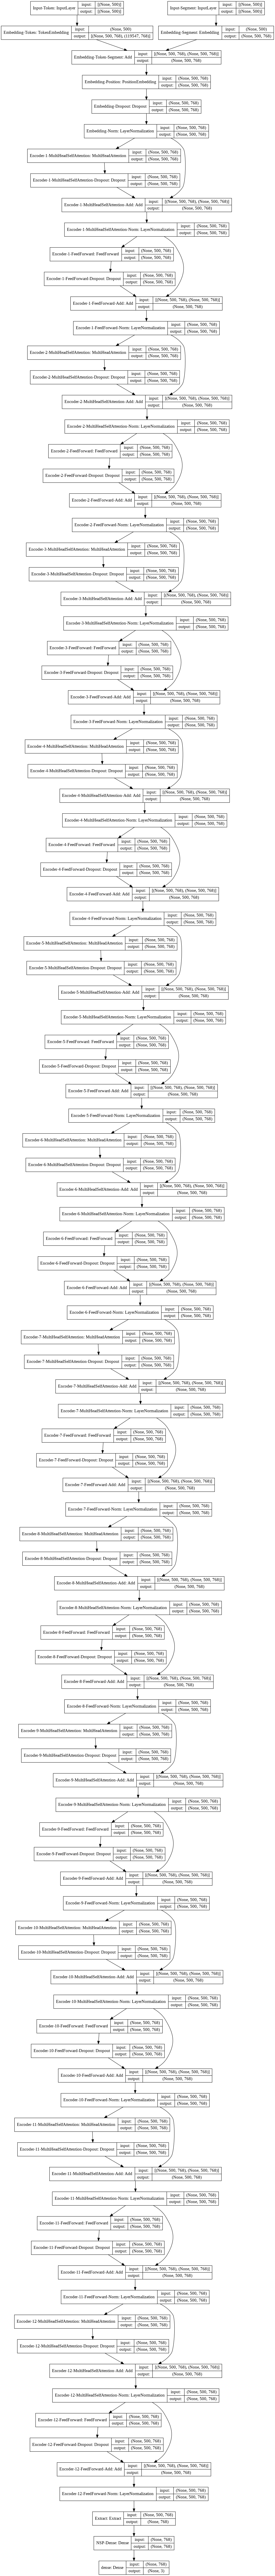

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [ ]:
hist = learner.fit_onecycle(2e-5, 6 )



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/6
563/563 [==============================] - 1176s 2s/step - loss: 1.0718 - accuracy: 0.3973 - val_loss: 1.0185 - val_accuracy: 0.4729
Epoch 2/6
563/563 [==============================] - 1149s 2s/step - loss: 1.0205 - accuracy: 0.4696 - val_loss: 0.9201 - val_accuracy: 0.5950
Epoch 3/6
563/563 [==============================] - 1149s 2s/step - loss: 0.9622 - accuracy: 0.5283 - val_loss: 0.8198 - val_accuracy: 0.6327
Epoch 4/6
563/563 [==============================] - 1149s 2s/step - loss: 0.8540 - accuracy: 0.6075 - val_loss: 0.6723 - val_accuracy: 0.7204
Epoch 5/6
563/563 [==============================] - 1147s 2s/step - loss: 0.6552 - accuracy: 0.7231 - val_loss: 0.3686 - val_accuracy: 0.8764
Epoch 6/6
563/563 [==============================] - 1148s 2s/step - loss: 0.3693 - accuracy: 0.8610 - val_loss: 0.1949 - val_accuracy: 0.9366


In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

           💁       0.91      0.97      0.94      1121
           🤦       0.95      0.96      0.96      1120
           🤷       0.96      0.88      0.92      1132

    accuracy                           0.94      3373
   macro avg       0.94      0.94      0.94      3373
weighted avg       0.94      0.94      0.94      3373



array([[1085,   20,   16],
       [  16, 1078,   26],
       [  97,   39,  996]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['0', '1', '2']

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

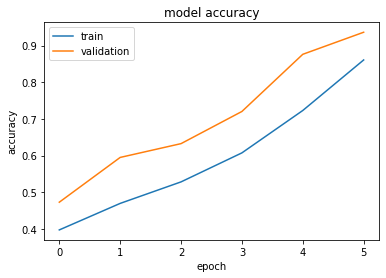

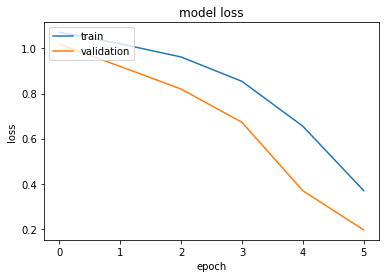

In [ ]:

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

print(precision_recall_fscore_support(data_test.Emoji, predictions, average = 'weighted', zero_division= 'warn'))

(0.9378421630656781, 0.9365549955529202, 0.9362581583737664, None)



F1 Score: 93.66


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129335 missing from current font.
  font.se

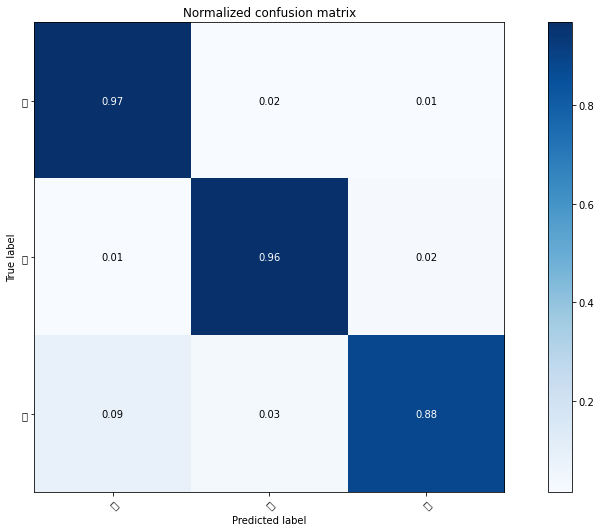

IndexError: ignored

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(10, 5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emoji, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Emoji, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
#plot_confusion_matrix(y_true,y_pred,classes=class_names)
plt.show()

print('Message: {}\nPredicted: {}'.format(x_test[10], predictions[10]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(data_test.Emoji, predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(data_test.Emoji, predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(data_test.Emoji, predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(data_test.Emoji, predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(data_test.Emoji, predictions, target_names=class_names))


Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.94
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score: 0.94

Classification Report

              precision    recall  f1-score   support

           💁       0.91      0.97      0.94      1121
           🤦       0.95      0.96      0.96      1120
           🤷       0.96      0.88      0.92      1132

    accuracy                           0.94      3373
   macro avg       0.94      0.94      0.94      3373
weighted avg       0.94      0.94      0.94      3373



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics

cm = confusion_matrix(data_test.Emoji, predictions)

TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))

Sensitivity :  0.9854677565849228
Specificity :  0.9817850637522769
false positive rate :  0.018214936247723135
false negative rate :  0.014532243415077202
Negative Predictive Value :  0.9853747714808044
False Discovery rate :  0.01809954751131222


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,model.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,model.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))
print('Cohen_Kappa_Score:', cohen_kappa_score(data_test.Emoji, predictions))

Mean Absolute Error: 0.084346615
Mean Squared Error: 0.032861803
Root Mean Squared Error: 0.18127824
Cohen_Kappa_Score: 0.9048445663988167


In [ ]:
import time 

message = 'শিশু শব্দটার সাথে মিশে আছে ভালোবাসা আদর এবং মমতা'

start_time = time.time() 
prediction = predictor.predict(message)

if prediction == '0':
  print('💁')
if prediction == '1':
  print('🤦')
if prediction == '2':
  print('🤷')

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

💁
predicted: 0 (0.19)


In [ ]:
predictor.save("models/bert_model")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
